-----------
Initializing structure...
time for choose_chunkdivision = 7.70092e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 10 with resolution 90
time for set_epsilon = 0.000221014 s
-----------


FloatProgress(value=0.0, description='0% done ', max=10000.0)

Meep progress: 367.9555555555556/10000.0 = 3.7% done in 4.0s, 104.7s to go
on time step 66304 (time=368.356), 6.03289e-05 s/step
Meep progress: 713.7555555555556/10000.0 = 7.1% done in 8.0s, 104.1s to go
on time step 128556 (time=714.2), 6.42558e-05 s/step
Meep progress: 1064.2777777777778/10000.0 = 10.6% done in 12.0s, 100.8s to go
on time step 191664 (time=1064.8), 6.33837e-05 s/step
Meep progress: 1438.788888888889/10000.0 = 14.4% done in 16.0s, 95.2s to go
on time step 259091 (time=1439.39), 5.93237e-05 s/step
Meep progress: 1813.7111111111112/10000.0 = 18.1% done in 20.0s, 90.3s to go
on time step 326584 (time=1814.36), 5.92661e-05 s/step
Meep progress: 2166.105555555556/10000.0 = 21.7% done in 24.0s, 86.8s to go
on time step 390012 (time=2166.73), 6.30639e-05 s/step
Meep progress: 2523.8055555555557/10000.0 = 25.2% done in 28.0s, 82.9s to go
on time step 454417 (time=2524.54), 6.21079e-05 s/step
Meep progress: 2884.9/10000.0 = 28.8% done in 32.0s, 78.9s to go
on time step 519436 

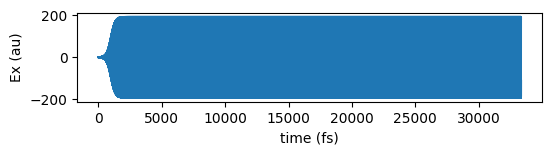

In [77]:
# Reference simulation (source only)

# Experimental values for input
# n=2.46
# n2=1.25*10^-18 m^2/V^2
# wavelength=1.53um
# slab thickness = wavelength
# input amplitude a=1.927*10^8 V/m

import meep as mp
import numpy as np
import matplotlib.pyplot as plt

sz = 10          # size of cell in z direction
amp = 0.5*10**3*1.5417      # amplitude of source
dpml = 2        # PML thickness
k = 4.1e-6        # Kerr susceptibility
n=2.46         # index
time_set=10000         # simulation run time
resolution = 90

#----Continuous Source
frq_cs=1/1.53          # meep frequency
cs_width=100          #the inverse of the exponential rate at which the current turns off and on

# frequency range for monitors
nfreq = 1
fmin = 1/1.53
fmax = 1/1.53

# Geometry
d_s=1.53# slab thickness
pos_s=0# slab position

geometry = [mp.Block(center=mp.Vector3(0,0,pos_s),size=mp.Vector3(0,0,d_s), material=mp.Medium(index=n, chi3=[] ))]
geometry2 = [mp.Block(center=mp.Vector3(0,0,pos_s),size=mp.Vector3(0,0,d_s), material=mp.Medium(index=n, chi3=k ))]

dimensions = 1
cell = mp.Vector3(0, 0, sz)
pml_layers = mp.PML(dpml)
default_material = mp.Medium(index=1, chi3=[])

sources = mp.Source(mp.ContinuousSource(frq_cs, width=cs_width), component=mp.Ex,
					center=mp.Vector3(0, 0, -0.5*sz + dpml), amplitude=amp)

sim = mp.Simulation(cell_size=cell,
					geometry=[],
					sources=[sources],
					boundary_layers=[pml_layers],
					default_material=default_material,
					resolution=resolution,
					dimensions=dimensions)

trans_ref = sim.add_flux(0.5 * (fmin + fmax), fmax - fmin, nfreq,
						mp.FluxRegion(mp.Vector3(0, 0, 0.5*sz - dpml - 4)))
refl_ref = sim.add_flux(0.5 * (fmin + fmax), fmax - fmin, nfreq,
						mp.FluxRegion(mp.Vector3(0, 0, 0.5*sz - dpml - 4)))

#         Define E field monitor
dx=1/resolution
dt=0.5*dx
tm_val_x=[]
def get_dot(sim):	
	tm_val_x.append(sim.get_array(size=mp.Vector3(), center=mp.Vector3(0,0,-0.5*sz + dpml), component=mp.Ex))
#        #        #        #    

sim.run(mp.at_every(dt,get_dot),until=time_set)


#         plot results
tm_val_x=np.array(tm_val_x)
max_ind=np.size(tm_val_x)
c=3*10**8 # m/s speed of light
mon_t=[]
for n in np.arange(0,max_ind,1):
	mon_tmp=(dt+dt*n)*(10**-6/c)*10**15 # s
	mon_t.append(mon_tmp)

figure2=plt.figure(dpi=100)
ax1=plt.subplot(3, 1, 1)
plt.plot(mon_t,tm_val_x)
plt.xlabel('time (fs)')
plt.ylabel('Ex (au)') 

#         Save reference data
freqs_ref = mp.get_flux_freqs(trans_ref)
plt_range_ref=1/np.asarray(freqs_ref)
box_x1_trans_ref = mp.get_fluxes(trans_ref)
flux_ref=np.asarray(box_x1_trans_ref)

#         Print amplitude and intensity of field
print("E_0=",np.amax(tm_val_x),"V/um")
print("E_0=",np.amax(tm_val_x)/(10**-6),"V/m")
print("I=",np.amax(np.abs(tm_val_x))**2/(2*120*np.pi),"W/um^2")

-----------
Initializing structure...
time for choose_chunkdivision = 7.98702e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 10 with resolution 90
     block, center = (0,0,0)
          size (0,0,1.53)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (6.0516,6.0516,6.0516)
time for set_epsilon = 0.000262976 s
-----------


FloatProgress(value=0.0, description='0% done ', max=10000.0)

Meep progress: 354.1666666666667/10000.0 = 3.5% done in 4.0s, 108.9s to go
on time step 63841 (time=354.672), 6.26565e-05 s/step
Meep progress: 730.6444444444445/10000.0 = 7.3% done in 8.0s, 101.5s to go
on time step 131617 (time=731.206), 5.90181e-05 s/step
Meep progress: 1113.2055555555555/10000.0 = 11.1% done in 12.0s, 95.8s to go
on time step 200487 (time=1113.82), 5.80809e-05 s/step
Meep progress: 1492.4611111111112/10000.0 = 14.9% done in 16.0s, 91.2s to go
on time step 268769 (time=1493.16), 5.85816e-05 s/step
Meep progress: 1868.388888888889/10000.0 = 18.7% done in 20.0s, 87.0s to go
on time step 336441 (time=1869.12), 5.91087e-05 s/step
Meep progress: 2222.666666666667/10000.0 = 22.2% done in 24.0s, 84.0s to go
on time step 400208 (time=2223.38), 6.27293e-05 s/step
Meep progress: 2594.1111111111113/10000.0 = 25.9% done in 28.0s, 79.9s to go
on time step 467090 (time=2594.94), 5.98071e-05 s/step
Meep progress: 2974.5666666666666/10000.0 = 29.7% done in 32.0s, 75.6s to go
on tim

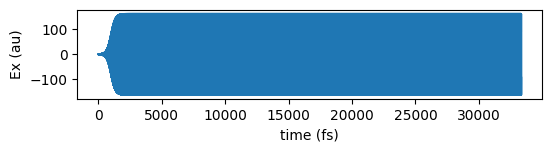

In [78]:
# 1d simulation of a plane wave propagating through a linear slab
sim.reset_meep()

sim = mp.Simulation(cell_size=cell,
					geometry=geometry,
					sources=[sources],
					boundary_layers=[pml_layers],
					default_material=default_material,
					resolution=resolution,
					dimensions=dimensions)

trans = sim.add_flux(0.5 * (fmin + fmax), fmax - fmin, nfreq,
						mp.FluxRegion(mp.Vector3(0, 0, 0.5*sz - dpml - 4)))
refl = sim.add_flux(0.5 * (fmin + fmax), fmax - fmin, nfreq,
						mp.FluxRegion(mp.Vector3(0, 0, -0.5*sz + dpml + 4)))

tm_val_x=[]
sim.run(mp.at_every(dt,get_dot),until=time_set)


#         plot results
freqs_lin = mp.get_flux_freqs(trans)
plt_range_lin=1/np.asarray(freqs_lin)
box_x1_trans_lin = mp.get_fluxes(trans)
flux_lin=np.asarray(box_x1_trans_lin)
box_x1_refl_lin = mp.get_fluxes(refl)
flux_refl_lin=np.asarray(box_x1_refl_lin)

tm_val_x=np.array(tm_val_x)
max_ind=np.size(tm_val_x)
c=3*10**8 # m/s speed of light
mon_t=[]
for n in np.arange(0,max_ind,1):
	mon_tmp=(dt+dt*n)*(10**-6/c)*10**15 # s
	mon_t.append(mon_tmp)

figure2=plt.figure(dpi=100)
ax1=plt.subplot(3, 1, 1)
plt.plot(mon_t,tm_val_x)
plt.xlabel('time (fs)')
plt.ylabel('Ex (au)') 

#         Print amplitude and intensity of field
print("E_0=",np.amax(tm_val_x),"V/um")
print("E_0=",np.amax(tm_val_x)/(10**-6),"V/m")
print("I=",np.amax(np.abs(tm_val_x))**2/(2*120*np.pi),"W/um^2")

-----------
Initializing structure...
time for choose_chunkdivision = 7.79629e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 10 with resolution 90
     block, center = (0,0,0)
          size (0,0,1.53)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (6.0516,6.0516,6.0516)
time for set_epsilon = 0.000269175 s
-----------


FloatProgress(value=0.0, description='0% done ', max=10000.0)

Meep progress: 350.1/10000.0 = 3.5% done in 4.0s, 110.3s to go
on time step 63096 (time=350.533), 6.34006e-05 s/step
Meep progress: 701.4166666666667/10000.0 = 7.0% done in 8.0s, 106.1s to go
on time step 126355 (time=701.972), 6.32324e-05 s/step
Meep progress: 1072.838888888889/10000.0 = 10.7% done in 12.0s, 99.9s to go
on time step 193216 (time=1073.42), 5.9826e-05 s/step
Meep progress: 1435.45/10000.0 = 14.4% done in 16.0s, 95.5s to go
on time step 258498 (time=1436.1), 6.1273e-05 s/step
Meep progress: 1785.5833333333335/10000.0 = 17.9% done in 20.0s, 92.0s to go
on time step 321528 (time=1786.27), 6.34625e-05 s/step
Meep progress: 2143.722222222222/10000.0 = 21.4% done in 24.0s, 88.0s to go
on time step 386001 (time=2144.45), 6.20421e-05 s/step
Meep progress: 2495.5944444444444/10000.0 = 25.0% done in 28.0s, 84.2s to go
on time step 449359 (time=2496.44), 6.31341e-05 s/step
Meep progress: 2873.8611111111113/10000.0 = 28.7% done in 32.0s, 79.3s to go
on time step 517460 (time=2874.7

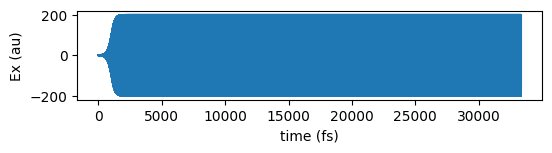

In [79]:
# 1d simulation of a plane wave propagating through a Kerr medium
sim.reset_meep()


#geometry = [mp.Block(center=mp.Vector3(0,0,(sz-dpml)/4),size=mp.Vector3(0,0,(sz-dpml)/2), material=mp.Medium(index=n, chi3=k ))]

sim = mp.Simulation(cell_size=cell,
					geometry=geometry2,
					sources=[sources],
					boundary_layers=[pml_layers],
					default_material=default_material,
					resolution=resolution,
					dimensions=dimensions)

trans = sim.add_flux(0.5 * (fmin + fmax), fmax - fmin, nfreq,
						mp.FluxRegion(mp.Vector3(0, 0, 0.5*sz - dpml - 4)))
refl = sim.add_flux(0.5 * (fmin + fmax), fmax - fmin, nfreq,
						mp.FluxRegion(mp.Vector3(0, 0, -0.5*sz + dpml + 4)))

tm_val_x=[]
sim.run(mp.at_every(dt,get_dot),until=time_set)

#         plot results
tm_val_x=np.array(tm_val_x)
max_ind=np.size(tm_val_x)
c=3*10**8 # m/s speed of light
mon_t=[]
for n in np.arange(0,max_ind,1):
	mon_tmp=(dt+dt*n)*(10**-6/c)*10**15 # s
	mon_t.append(mon_tmp)

figure2=plt.figure(dpi=100)
ax1=plt.subplot(3, 1, 1)
plt.plot(mon_t,tm_val_x)
plt.xlabel('time (fs)')
plt.ylabel('Ex (au)') 

#         Print amplitude and intensity of field
print("E_0=",np.amax(tm_val_x),"V/um")
print("E_0=",np.amax(tm_val_x)/(10**-6),"V/m")
print("I=",np.amax(np.abs(tm_val_x))**2/(2*120*np.pi),"W/um^2")

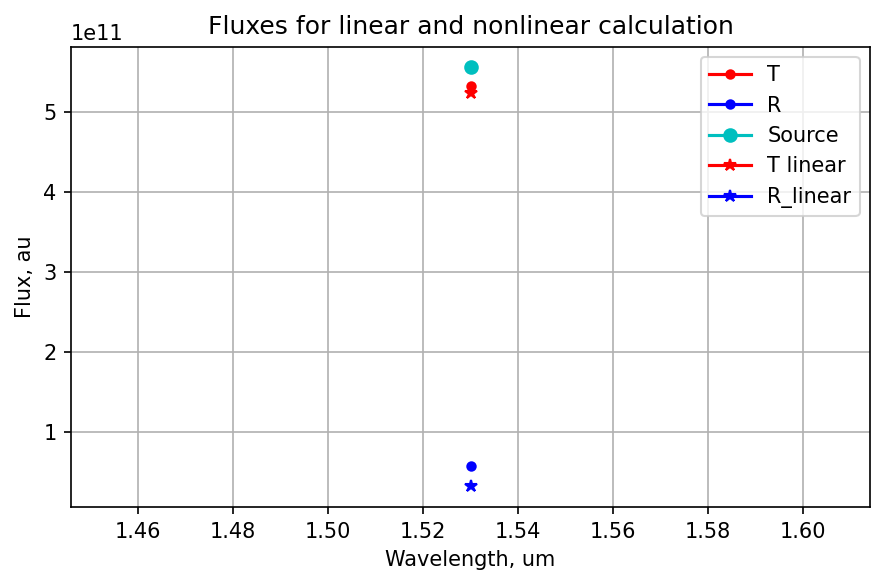

In [80]:
#         plot fluxes
freqs = mp.get_flux_freqs(trans)
plt_range=1/np.asarray(freqs)
box_x1_trans = mp.get_fluxes(trans)
flux=np.asarray(box_x1_trans)
box_x1_refl = mp.get_fluxes(refl)
flux_refl=np.asarray(box_x1_refl)
plt.figure(dpi=150)
plt.plot(plt_range_ref,flux,'ro-',label='T',markersize=4)
plt.plot(plt_range_ref,-flux_refl+flux_ref,'bo-',label='R',markersize=4)
plt.plot(plt_range_ref,flux_ref,'co-',label='Source')
plt.plot(plt_range_ref,flux_lin,'r*-',label='T linear')
plt.plot(plt_range_ref,-flux_refl_lin+flux_ref,'b*-',label='R_linear')
plt.grid(True,which="both",ls="-")
plt.xlabel('Wavelength, um')
plt.ylabel('Flux, au')
plt.legend(loc='upper right')
plt.title('Fluxes for linear and nonlinear calculation')
plt.tight_layout()

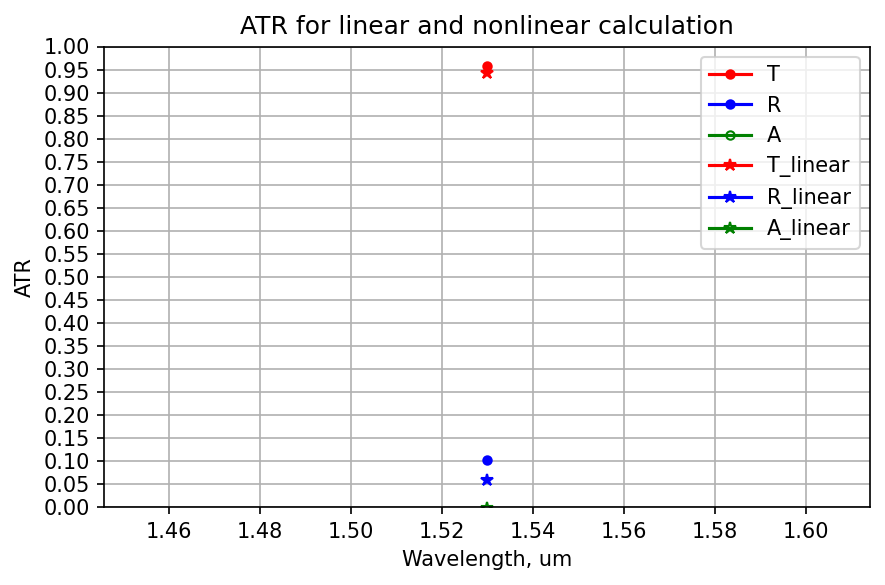

In [81]:
#         plot ATR
plt.figure(dpi=150)
plt.plot(plt_range_ref,flux/flux_ref,'ro-',label='T',markersize=4)
plt.plot(plt_range_ref,(-flux_refl+flux_ref)/flux_ref,'bo-',label='R',markersize=4)
plt.plot(plt_range_ref,1-(-flux_refl+flux_ref)/flux_ref-flux/flux_ref,'go-',label='A',markersize=4, markerfacecolor='none')
plt.plot(plt_range_ref,flux_lin/flux_ref,'r*-',label='T_linear')
plt.plot(plt_range_ref,(-flux_refl_lin+flux_ref)/flux_ref,'b*-',label='R_linear')
plt.plot(plt_range_ref,1-(-flux_refl_lin+flux_ref)/flux_ref-flux_lin/flux_ref,'g*-',label='A_linear', markerfacecolor='none')
plt.grid(True,which="both",ls="-")
plt.yticks([0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95, 1])
plt.xlabel('Wavelength, um')
plt.ylabel('ATR')
plt.legend(loc='upper right')
#plt.xlim([0.85, 5])
plt.ylim([0, 1])
plt.title('ATR for linear and nonlinear calculation')
plt.tight_layout()
np.savetxt('ATR.txt', (plt_range_ref,flux/flux_ref,1-flux_refl/flux_ref,1-(1-flux_refl/flux_ref)-flux/flux_ref), delimiter=',')